In [1]:
from ocpy.data import Data
# data okuma check

data = Data.from_file("ny_vir.xlsx")
data = data.calculate_weights()

Parameters([('linear_a', <Parameter 'linear_a', value=1.0290913820831305e-08 +/- 1.73e-08, bounds=[-inf:inf]>), ('linear_b', <Parameter 'linear_b', value=-8.283426093125559e-05 +/- 0.000137, bounds=[-inf:inf]>), ('quadratic_q', <Parameter 'quadratic_q', value=-9.223451272061157e-14 +/- 1.2e-13, bounds=[-inf:inf]>), ('keplerian1_amp', <Parameter 'keplerian1_amp', value=0.00041869870233055223 +/- 0.000403, bounds=[-inf:inf]>), ('keplerian1_e', <Parameter 'keplerian1_e', value=0.0 (fixed), bounds=[-inf:inf]>), ('keplerian1_omega', <Parameter 'keplerian1_omega', value=0.0 (fixed), bounds=[-inf:inf]>), ('keplerian1_P', <Parameter 'keplerian1_P', value=111067.37861544383 +/- 4.77e+04, bounds=[-inf:inf]>), ('keplerian1_T0', <Parameter 'keplerian1_T0', value=70288.41872687767 +/- 1.91e+04, bounds=[-inf:inf]>), ('keplerian2_amp', <Parameter 'keplerian2_amp', value=6.035295264682126e-05 +/- 6.37e-06, bounds=[-inf:inf]>), ('keplerian2_e', <Parameter 'keplerian2_e', value=0.0 (fixed), bounds=[-inf

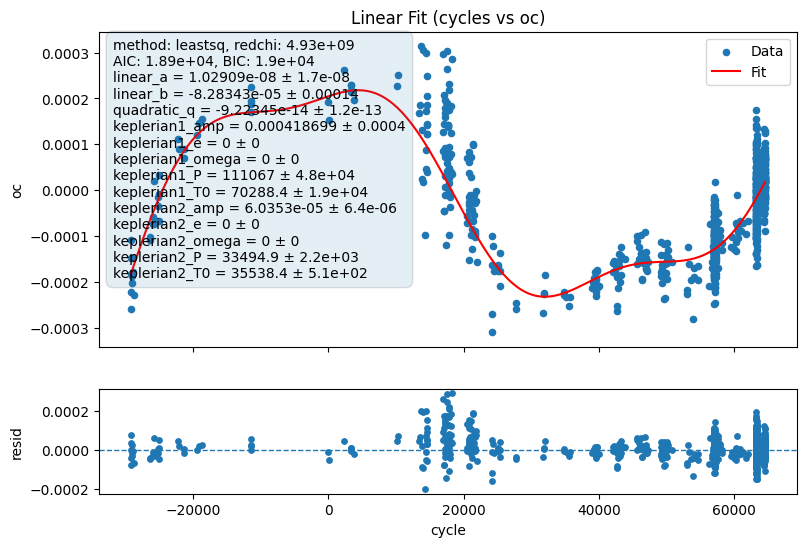

(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

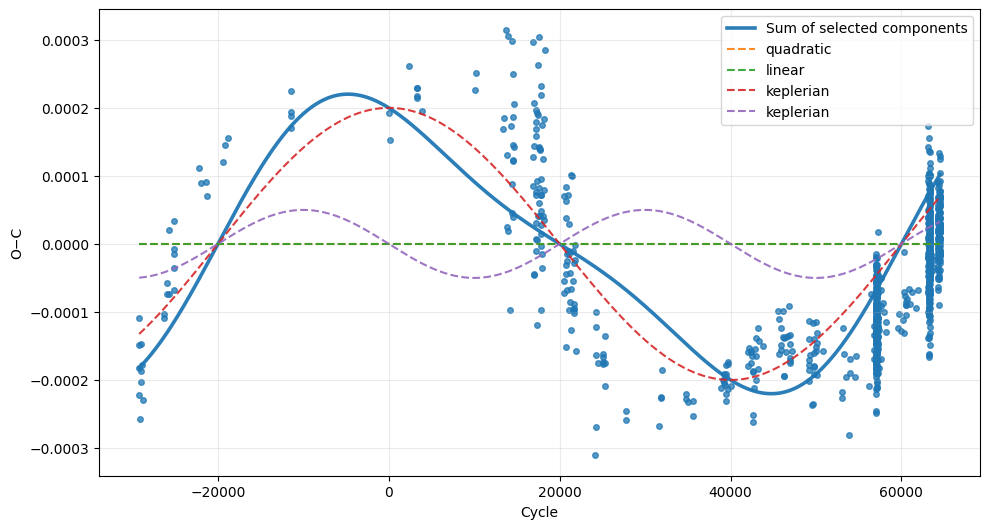

In [2]:
from ocpy.oc import Linear, Parameter, Quadratic, Keplerian
oc = data.calculate_oc(reference_minimum=2453174.442769, reference_period=0.101015969)
oc = oc[oc["labels"] != "vis"]

# 2) Lineer model (y = a*x + b), başlangıç değerleri Parameter(dataclass)
lin = Linear(
    a = Parameter(value=0.0, fixed=False),
    b = Parameter(value=0.0, fixed=False),
)
quad = Quadratic(
    q = Parameter(value=0.0, fixed=False),
)
lite1 = Keplerian(
    P = Parameter(value=80000, fixed=False),
    T0= Parameter(value=60000, fixed=False),
    amp = Parameter(value=0.0002, fixed=False),
    e = Parameter(value=0.0, fixed=True),
    omega = Parameter(value=0.0, fixed=True),
)
lite2 = Keplerian(
    P = Parameter(value=40000, fixed=False),
    T0 = Parameter(value=20000, fixed=False),
    amp = Parameter(value=0.00005, fixed=False),
    e = Parameter(value=0.0, fixed=True),
    omega = Parameter(value=0.0, fixed=True),
)

res = oc.fit([lin, quad, lite1, lite2])  
print(res.params)
oc.fit_and_report(res, title="Linear Fit (cycles vs oc)")

oc.plot_components_on_data([quad, lin, lite1, lite2])


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

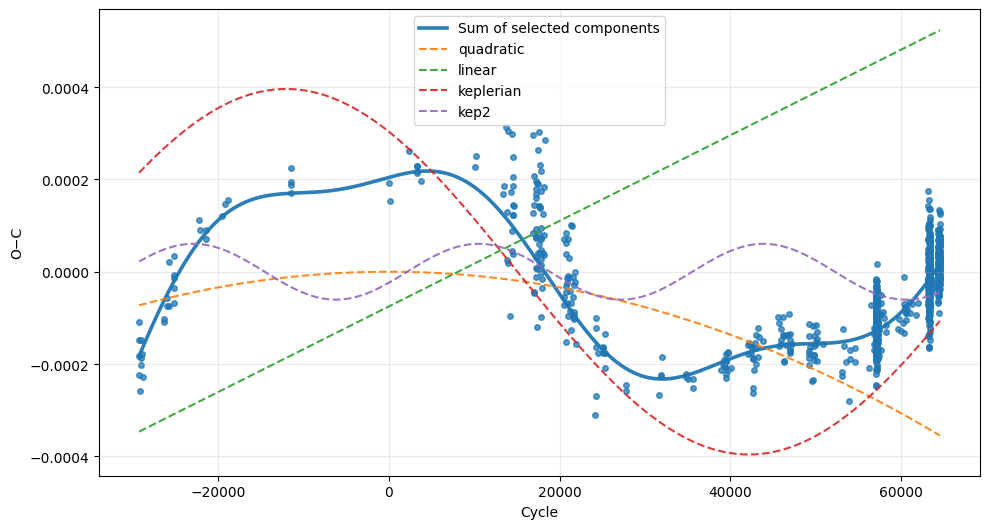

In [3]:
from ocpy.oc import Linear, Parameter, Quadratic, Keplerian

oc = data.calculate_oc(reference_minimum=2453174.442769, reference_period=0.101015969)
oc = oc[oc["labels"] != "vis"]

lin = Linear(
    a=Parameter(value=9.277027e-09, fixed=False),
    b=Parameter(value=-7.534806e-05, fixed=False),
)

quad = Quadratic(
    q=Parameter(value=-8.524342e-14, fixed=False),
)

lite1 = Keplerian(
    P=Parameter(value=1.082879e+05, fixed=False),
    T0=Parameter(value=6.921089e+04, fixed=False),
    amp=Parameter(value=3.958882e-04, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

lite2 = Keplerian(
    name="kep2",
    P=Parameter(value=3.336236e+04, fixed=False),
    T0=Parameter(value=6.889021e+04, fixed=False),
    amp=Parameter(value=6.046775e-05, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])